<a href="https://colab.research.google.com/github/Jbdpalle/AirbBnb-Data-Analyiss/blob/main/AirBnB_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Data Importing and Cleaning

In [1]:
# Importing the Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Mounting the Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing dataset
airbnb_data = pd.read_csv('/content/drive/MyDrive/CapStone Projects/Project 1/Copy of Airbnb NYC 2019.csv')


In [4]:
# Checking the shape of our dataset 

print(f"The shape of our dataset is {airbnb_data.shape}")

The shape of our dataset is (48895, 16)


In [5]:
# Checking the feature names of our dataset 
print(f"The names of the features in the dataset are:  \n{airbnb_data.columns}")


The names of the features in the dataset are:  
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [6]:
# Checking the information in our dataset 
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#Checking the first 5 rows of our dataset 
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
#Checking for categorical columns
cat_cols = airbnb_data.select_dtypes(include = 'object').columns
print(f' The following are the categorical features in the dataset: {list(cat_cols)}')

 The following are the categorical features in the dataset: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [9]:
# Checking for numeric/ non categorical columns
num_cols = airbnb_data.select_dtypes(exclude = 'object').columns
print(' The following are the non categorical features in the dataset:') 
list(num_cols)

 The following are the non categorical features in the dataset:


['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [10]:
# Checking how many missing data points we have 
num_cols = airbnb_data.select_dtypes(exclude = 'object').columns
print(f" The following are non categorical / numerical columns in the dataset: {list(num_cols)}")

 The following are non categorical / numerical columns in the dataset: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [11]:
# get the number of missing data points per column
missing_values_count = airbnb_data.isnull().sum()

# look at the missing points in the first ten columns
missing_values_count[:]

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
# how many total missing values do we have?
total_cells = np.product(airbnb_data.shape)
print(total_cells)
total_missing = missing_values_count.sum()
print(total_missing)

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(round(percent_missing,2))

782320
20141
2.57



# **OBSERVATIONS**
Looking at the Missing or null values above. I can conclude that last_reviews and reviews_per_month have the most
missing values. These values may be missed because they may have not been written by customers and since these features
don't affect outcome. I will be dropping them out of the dataset, along with latitude and longitude.

# Figuring out why there is missing data. 

Looking at the Missing or null values above. I can conclude that last_reviews and reviews_per_month have the most
missing values. These values may be missed because they may have not been written by customers and since these features
don't affect outcome. I will be dropping them out of the dataset, along with latitude and longitude.

In [13]:
# Dropping the unncessary columns .
airbnb_new_data = airbnb_data.drop(['latitude', 'longitude','last_review','reviews_per_month'], axis =1)
airbnb_new_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [14]:
# CHECKING THE NEW DATASET WITH MISSING VALUES AND REMOVED COLUMNS
missing_values_count = airbnb_new_data.isnull().sum()

# look at the missing points in the first 5 columns
missing_values_count[:5]

id                      0
name                   16
host_id                 0
host_name              21
neighbourhood_group     0
dtype: int64

In [15]:
# Filling missing values in the above dataset. 
airbnb_new_data['name'].fillna('Unavailable', inplace = True)
airbnb_new_data['host_name'].fillna('Unavailable', inplace = True)

In [16]:
airbnb_new_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [17]:
# CHECKING FOR ANY MISSING VALUES IN THE NEW DATASET 

print(f"The number of missing values in the new data set are {airbnb_new_data.isnull().sum()}")

The number of missing values in the new data set are id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


#EXPLORING THE DATA AND ANSWER THE QUESTIONS AT THE START OF THE NOTEBOOK. 
 WHAT CAN WE LEARN ABOUT DIFFERENT HOSTS AND AREAS

In [18]:
host_listing_areas = airbnb_new_data.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
leading_hosts = host_listing_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(9)
leading_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103
7479,Kazuya,Manhattan,103
7478,Kazuya,Brooklyn,103
6540,Jeremy & Laura,Manhattan,96
13216,Sonder,Manhattan,96


# Observation: FROM THE ABOVE RESULT. WE CAN SEE THAT Host_name 

SONDER(NYC) has 327 listings in Manhattan 

BLUEGROUND has 232 listings in Manhattan and 232 listings in Brooklyn

# Data Visualisation: 

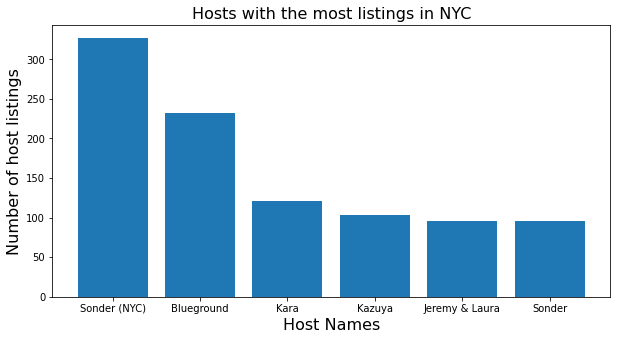

In [19]:
#Hosts with the most Listings.
plt.rcParams['figure.figsize'] = (10,5)
host_name = leading_hosts['host_name']
host_listing = leading_hosts['calculated_host_listings_count']
plt.bar(host_name, host_listing)
plt.title('Hosts with the most listings in NYC', {'fontsize': 16})
plt.xlabel('Host Names', {'fontsize': 16})
plt.ylabel('Number of host listings', {'fontsize':16})
plt.show()

In [20]:
# Number of Airbnb's listed in each neighbourhood
data =airbnb_new_data.groupby(['neighbourhood_group'])['id'].count().reset_index().rename(columns = {'id':'count'}).sort_values(by='count', ascending = False)
data.head()

,neighbourhood_group,count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


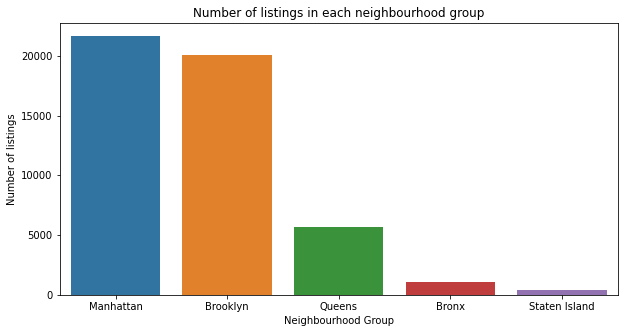

In [21]:
# Visualizing the number of listings in each neighbourhood through bar plot
plt.rcParams['figure.figsize'] = (10,5)
ax = sns.barplot(x = data['neighbourhood_group'], y = data['count'], data = data)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of listings')
ax.set_title('Number of listings in each neighbourhood group')
plt.show()

## Learnings from predictions (ex: locs, prices, reviews, etc)


In [22]:
# Finding the neighbourhood with maximum number of reviews. 
areas_reviews = airbnb_new_data.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
areas_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


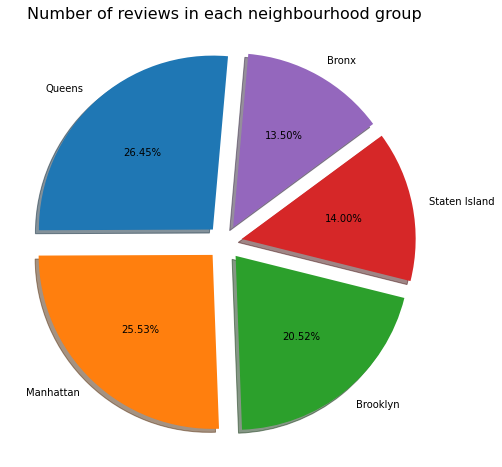

In [23]:
# Visualising the number of reviews in each neighbourhood group by a pie chart
plt.rcParams['figure.figsize'] = (12,8)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews, labels = areas_reviews['neighbourhood_group'], autopct ='%0.2f%%', startangle =85, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )
plt.title('Number of reviews in each neighbourhood group', {'fontsize': 16})
plt.show()

Observation : The share percentage of reviews for each neighbourhood group are depicted above. We can observe that the neighbourhoods Queens, Manhattan have majority of reviews which implies that people like these neighbourhoods. We can also conclude that the majority of revenue is generated by these neighbourhoods.

In [24]:
# Checking the descriptive statistics
airbnb_new_data.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


We can observe the following from the above summary 

*   Average price for a room is $152.72 per night 
*   Average number of nights a customer rents is 7.02 
*   The listings are available 117 days per year on an average
*   An average host has atleast 7.14 listings 
*   Customer reveiw an average of 23.27 

We can also observe a discrepancy between the minimum and maximum price charged. Now is a good time for us to check for Outliers as there is something not quite right with the data. 






In [26]:
#Checking for outliers 
airbnb_new_data.agg({'price': ['mean', 'median', 'max', 'count']})

,price
mean,152.720687
median,106.000000
max,10000.000000
count,48895.000000


From previous observations
Minimum price is recorded as Zero - which is untrue as there are no free rooms on Airbnb 
Maximum price is recorded as $10000 - which is quite expensive. 
We can also see that the mean is higher than the median, this could also mean that the data is biased. 

Let us get a better understanding of price distribution using a box plot

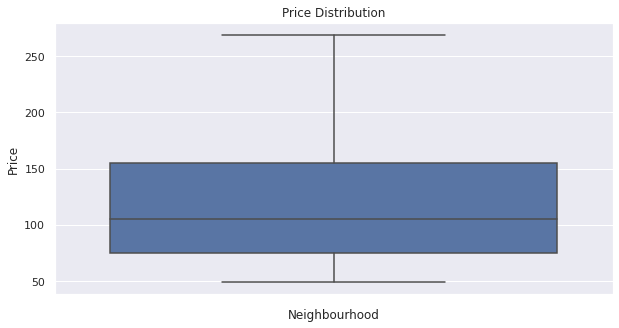

In [61]:
#Plotting boxplot for price data 
plt.figure(figsize = (10,5))
ax = sns.boxplot(y='price', data = airbnb_new_data).set_title('Price Distribution')
sns.set_theme(style='darkgrid')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.show()


We can see from the above visualisation that there are outliers present in this data. We will fix this by using the quantile based flooring and capping. 

First let's print the high(90th) and low(10th) percentiles 

In [33]:
#Low Quantile
q_low = airbnb_new_data['price'].quantile(0.10)
q_low

49.0

In [34]:
#High Quantile
q_high = airbnb_new_data['price'].quantile(0.9)
q_high

269.0

From the above calculations we can see that 
10th percentile is $49 US
90th percentile is 269 US

It's not uncommon for some listing with airbnb to be super expensive. Let's set our values between $49 - $269 and remove values that dont apply to the above specified range. We can do this because we know that our data can be skewed wiht outliers. 

In [35]:
# Removing the values above 90th percentile and below 10th percentile. 
airbnb_new_data = airbnb_new_data.drop(airbnb_new_data[airbnb_new_data['price']<q_low].index)
airbnb_new_data = airbnb_new_data.drop(airbnb_new_data[airbnb_new_data['price']>q_high].index)

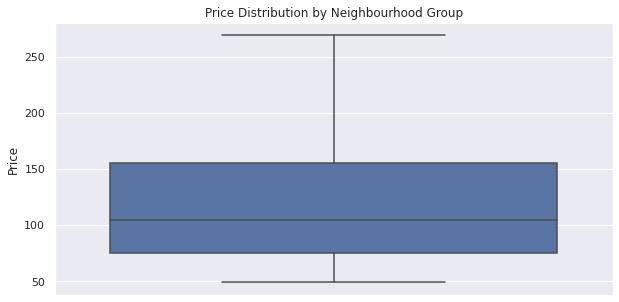

In [36]:
# Creating a box plot to check the result 
plt.figure(figsize = (10,5))
ax = sns.boxplot(y='price', data = airbnb_new_data).set_title('Price Distribution')
sns.set_theme(style = 'whitegrid')
plt.ylabel('Price')
plt.show()

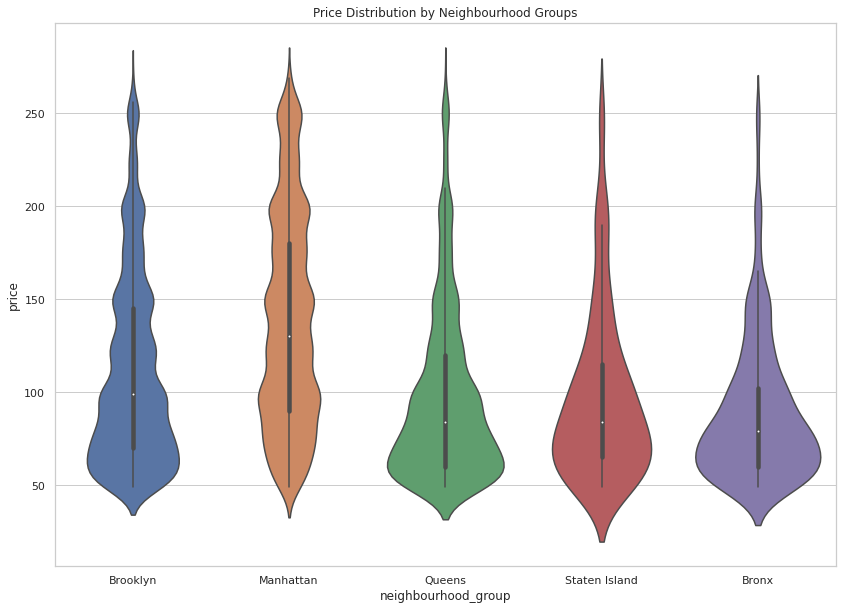

In [39]:
# Seeing price Distrubution by the respective neighbourhood groups
plt.figure(figsize = (14,10))
ax = sns.violinplot(x = 'neighbourhood_group', y = 'price', data = airbnb_new_data).set_title('Price Distribution by Neighbourhood Groups')
plt.show()

- Which Hosts are Busiest and Why? 

In [45]:
#Host with most reviews are busiest as people are booking more with them based on the reviews 
busiest_hosts = airbnb_new_data.groupby(['host_name', 'host_id', 'room_type', 'neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending = False).head(8)
busiest_hosts

,host_name,host_id,room_type,neighbourhood_group,number_of_reviews
14715,Jj,4734398,Private room,Manhattan,607
5180,Carol,2369681,Private room,Manhattan,540
3266,Asa,12949460,Entire home/apt,Brooklyn,488
31453,Wanda,792159,Private room,Brooklyn,480
18672,Linda,2680820,Private room,Queens,474
7162,Dani,42273,Entire home/apt,Brooklyn,467
2420,Angela,23591164,Private room,Queens,466
451,Agnes,277379,Private room,Manhattan,458


<BarContainer object of 8 artists>

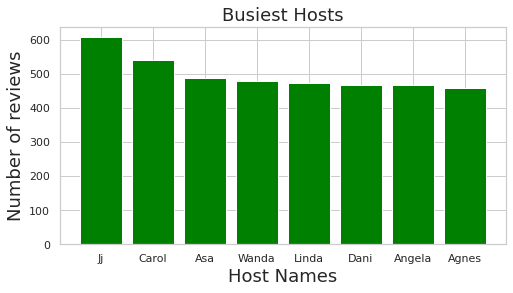

In [51]:
#Visualising the busiest hosts data through bar plot.
host_name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']
plt.title('Busiest Hosts', {'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of reviews',{'fontsize':18})
plt.bar(host_name, reviews, color= 'Green')

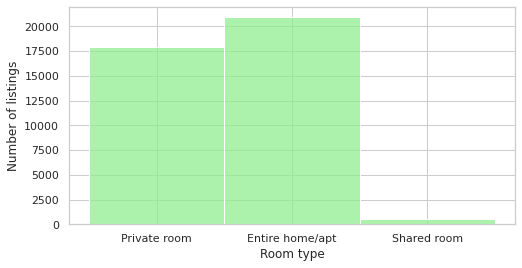

In [55]:
# Plotting histogram for room types to look for which are most preferred room types.
plt.rcParams['figure.figsize'] = (8,4)
hp = sns.histplot(airbnb_new_data['room_type'], color= 'lightgreen')
hp.set_xlabel('Room type') 
hp.set_ylabel('Number of listings')
plt.show()

We can see from the above bar plot that 
JI, Carol, Asa, Wanda and Linda are the top 5 busiest hosts. This is due to them hosting an Entire Home/ Apts and Private Rooms which are the most preferred room types according to above histogram plots. 



- Which Room types are most prefrerred in the most popular neighbourhood. 

In [59]:
# Finding the top 10 neighbourhoods with most listings

top_10 = airbnb_new_data.groupby(['neighbourhood'])['id'].count().nlargest(10)
top_10

neighbourhood
Williamsburg          3415
Bedford-Stuyvesant    2963
Harlem                2311
Bushwick              1846
Upper West Side       1619
East Village          1590
Hell's Kitchen        1576
Upper East Side       1561
Crown Heights         1257
Midtown               1002
Name: id, dtype: int64

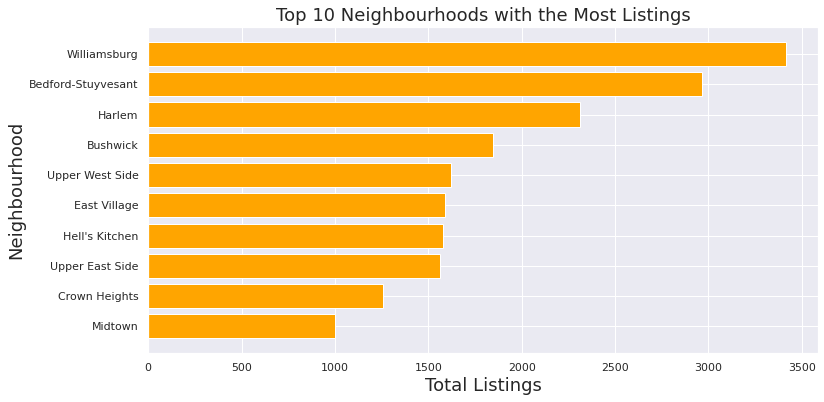

In [68]:
# Visualizing the top 10 neighbourhood listings through a bar plot
plt.figure(figsize=(12,6))
x = list(top_10.index)
y = list(top_10.values)
x.reverse()
y.reverse()

plt.title("Top 10 Neighbourhoods with the Most Listings", {'fontsize':18})
plt.ylabel("Neighbourhood", {'fontsize':18})
plt.xlabel("Total Listings", {'fontsize':18})

plt.barh(x, y,color= 'orange')
plt.show()

The Neighbourhood with the most listings are in the Manhattan and Brookyln area. This may be because of the tourists attractions present in these neighbourhoods. 

Willamsburg in Brooklyn has 3415 listings 
Harlem in Manhattan has the second most listings at 2311. 


In [69]:
airbnb_new_data.groupby(['neighbourhood_group','neighbourhood','room_type'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False).head(10)

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
255,Manhattan,Harlem,Private room,607
270,Manhattan,Lower East Side,Private room,540
196,Brooklyn,Park Slope,Entire home/apt,488
132,Brooklyn,Bushwick,Private room,480
358,Queens,Flushing,Private room,474
212,Brooklyn,South Slope,Entire home/apt,467
348,Queens,East Elmhurst,Private room,466
241,Manhattan,East Village,Private room,451
318,Queens,Astoria,Entire home/apt,441
419,Queens,Springfield Gardens,Entire home/apt,434
